Algotimo genético 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Hiperparâmetros
QntPopulacao = 50
QntGeracoes = 1000
TaxaMutacao = 0.1

np.random.seed(42)

# Dados do problema da mochila

rangePesos = [50, 100]
rangeValores = [50, 200]
num_itens = 25

# Gera os pesos e valores usando a semente definida
pesos = np.random.randint(rangePesos[0], rangePesos[1] + 1, size=num_itens)
valores = np.random.randint(rangeValores[0], rangeValores[1] + 1, size=num_itens)

capacidade_mochila = 1000

In [9]:
def inicializar_populacao(tamanho_populacao, num_itens):
    return np.random.randint(2, size=(tamanho_populacao, num_itens))

In [10]:
def selecao_torneio(populacao, fitnesses, qntd_Torneios, qntd_porTorneio):
    selecionados = []
    for _ in range(qntd_Torneios):
        candidatos = np.random.choice(len(populacao), size=qntd_porTorneio, replace=False)
        selecionados.append(candidatos[np.argmax(fitnesses[candidatos])])
    return selecionados

In [11]:
def cruzamento(pai1, pai2):
    ponto_cruzamento = np.random.randint(1, len(pai1))
    filho1 = np.concatenate((pai1[:ponto_cruzamento], pai2[ponto_cruzamento:]))
    filho2 = np.concatenate((pai2[:ponto_cruzamento], pai1[ponto_cruzamento:]))
    return filho1, filho2

In [12]:
def mutacao(solucao, taxa_mutacao):
    for i in range(len(solucao)):
        if np.random.rand() < taxa_mutacao:
            solucao[i] = 1 - solucao[i]
    return solucao

In [13]:
def fitness(solucao, pesos, valores, capacidade_mochila):
    valor_total = sum(valores[i] for i in range(len(solucao)) if solucao[i] == 1)
    peso_total = sum(pesos[i] for i in range(len(solucao)) if solucao[i] == 1)
    if peso_total > capacidade_mochila:
        return 0  # Retorna 0 se a solução exceder a capacidade da mochila
    else:
        return valor_total  # Retorna o valor total da mochila

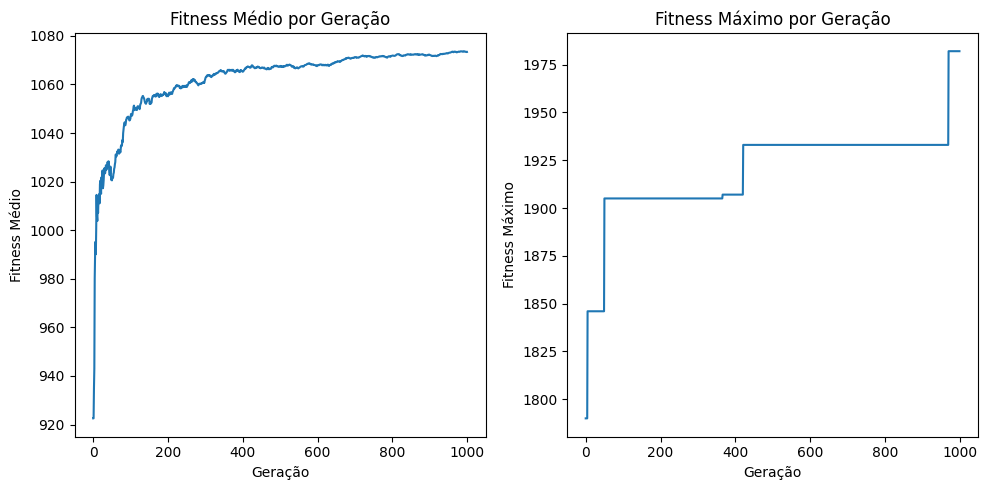

In [14]:
def algoritmo_genetico(pesos, valores, capacidade_mochila, tamanho_populacao, num_geracoes, taxa_mutacao):
    populacao = inicializar_populacao(tamanho_populacao, len(pesos))
    
    fitnesses = np.array([fitness(solucao, pesos, valores, capacidade_mochila) for solucao in populacao])
    fitnesses_medios = []
    melhores_fitnesses = []  

    for _ in range(num_geracoes):
        novos_individuos = []
        for _ in range(tamanho_populacao // 2):
            pais = selecao_torneio(populacao, fitnesses, 2, 2)
            filhos = cruzamento(populacao[pais[0]], populacao[pais[1]])
            filhos = [mutacao(filho, taxa_mutacao) for filho in filhos]
            novos_individuos.extend(filhos)
        populacao = np.vstack((populacao, novos_individuos))
        fitnesses = np.append(fitnesses, [fitness(solucao, pesos, valores, capacidade_mochila) for solucao in novos_individuos])
        fitnesses_medios.append(np.mean(fitnesses))
        melhores_fitnesses.append(np.max(fitnesses))  

    # Plotagem do fitness médio
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fitnesses_medios)
    plt.xlabel('Geração')
    plt.ylabel('Fitness Médio')
    plt.title('Fitness Médio por Geração')

    # Plotagem do fitness máximo
    plt.subplot(1, 2, 2)
    plt.plot(melhores_fitnesses)
    plt.xlabel('Geração')
    plt.ylabel('Fitness Máximo')
    plt.title('Fitness Máximo por Geração')

    plt.tight_layout()
    plt.show()

# Executando o algoritmo genético
algoritmo_genetico(pesos, valores, capacidade_mochila, QntPopulacao, QntGeracoes, TaxaMutacao)